# 1. Import Necessary Libraries

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc,classification_report,accuracy_score
from sklearn.metrics import mean_squared_error ,mean_absolute_error,log_loss
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# 2. Read In and Explore the Data

In [93]:
#converting into dataframe
df = pd.read_csv('HR_attrition_rate.csv')

In [94]:
df.shape

(14999, 10)

In [95]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [96]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Imputing Missing Values with Medians

In [97]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [98]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Departments               object
salary                    object
dtype: object

In [99]:
df['Work_accident'].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [100]:
df['promotion_last_5years'].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [101]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [102]:
df['Departments '].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Departments , dtype: int64

In [103]:
df['time_spend_company'].value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

In [104]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

We difine attrition rate based on left feature and we can clearly see that the data is imbalanced

# 3. Exploratory Data Analysis Data Visualization

## What is department wise attrition rate?

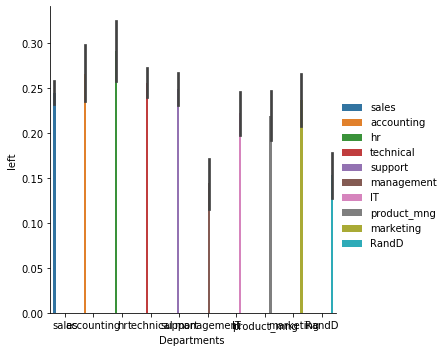

In [14]:
sns.catplot(x="Departments ", y="left",hue="Departments ", kind="bar", data=df)\
             .add_legend();

Summary:<br>
1.HR department has highest attrition rate, followed by accounting and sales.<br>
2.Marketing department has least attrition rate

## Does salary of the people impacts attrition?

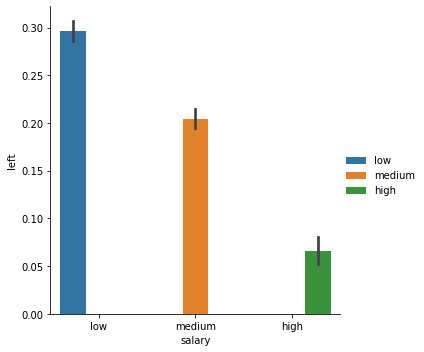

In [15]:
sns.catplot(x="salary", y="left",hue="salary", kind="bar", data=df)\
             .add_legend();

Summary:<br>
1.Lower the salary higher the attrition

## Does promotion impacts attrition?

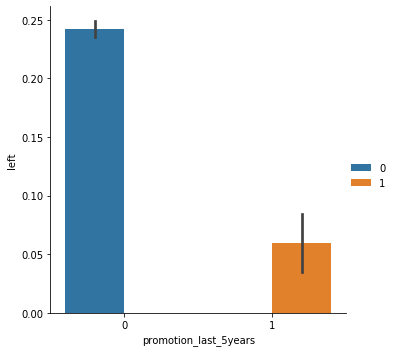

In [32]:
sns.catplot(x="promotion_last_5years", y="left",hue="promotion_last_5years", kind="bar", data=df)\
             .add_legend();

Summary:<br>
1.Promotion impacts highly on attrition , employees who don't get promoted have higher chance of leaving the company.

## Work hours impact on attrition

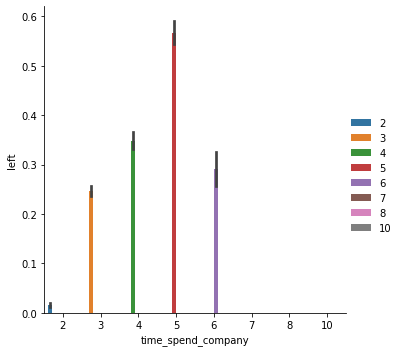

In [37]:
sns.catplot(x="time_spend_company", y="left",hue="time_spend_company", kind="bar", data=df)\
             .add_legend();

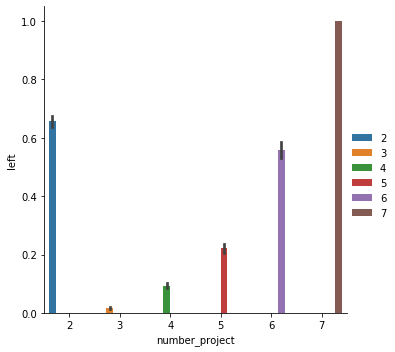

In [43]:
sns.catplot(x="number_project", y="left",hue="number_project", kind="bar", data=df)\
             .add_legend();

Summary:<br>
1.Those who don't get any project mostly on bench and those who did lots of project have higher chance of leaving company.

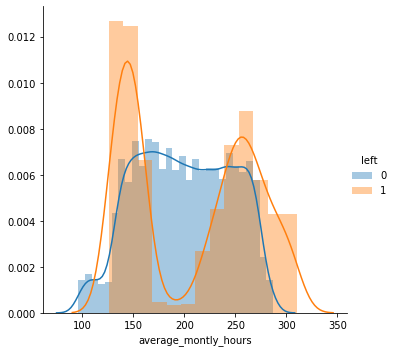

In [39]:
import seaborn as sb
sb.FacetGrid(df,hue='left',height=5)\
    .map(sb.distplot,'average_montly_hours')\
    .add_legend();
plt.show()

Summary:<br>
1.Those who work more than 270 avergae monthly hours have higher chance of leaving the comapny.<br>
2.200 hrs per month is considered as healthy working hours.

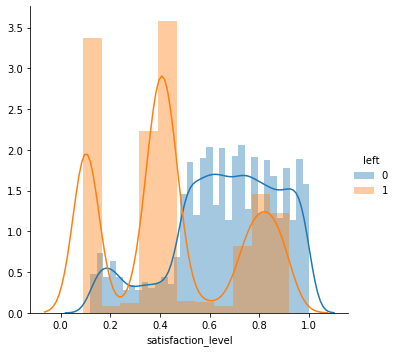

In [40]:
import seaborn as sb
sb.FacetGrid(df,hue='left',height=5)\
    .map(sb.distplot,'satisfaction_level')\
    .add_legend();
plt.show()

Summary:<br>
1.Employees with less satisfaction level have higher chance of termination.

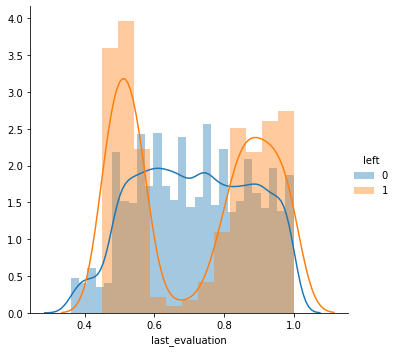

In [42]:
import seaborn as sb
sb.FacetGrid(df,hue='left',height=5)\
    .map(sb.distplot,'last_evaluation')\
    .add_legend();
plt.show()

Summary:<br>
1.The employee who is overrated and the one who is underrated has higher chnace of leaving.

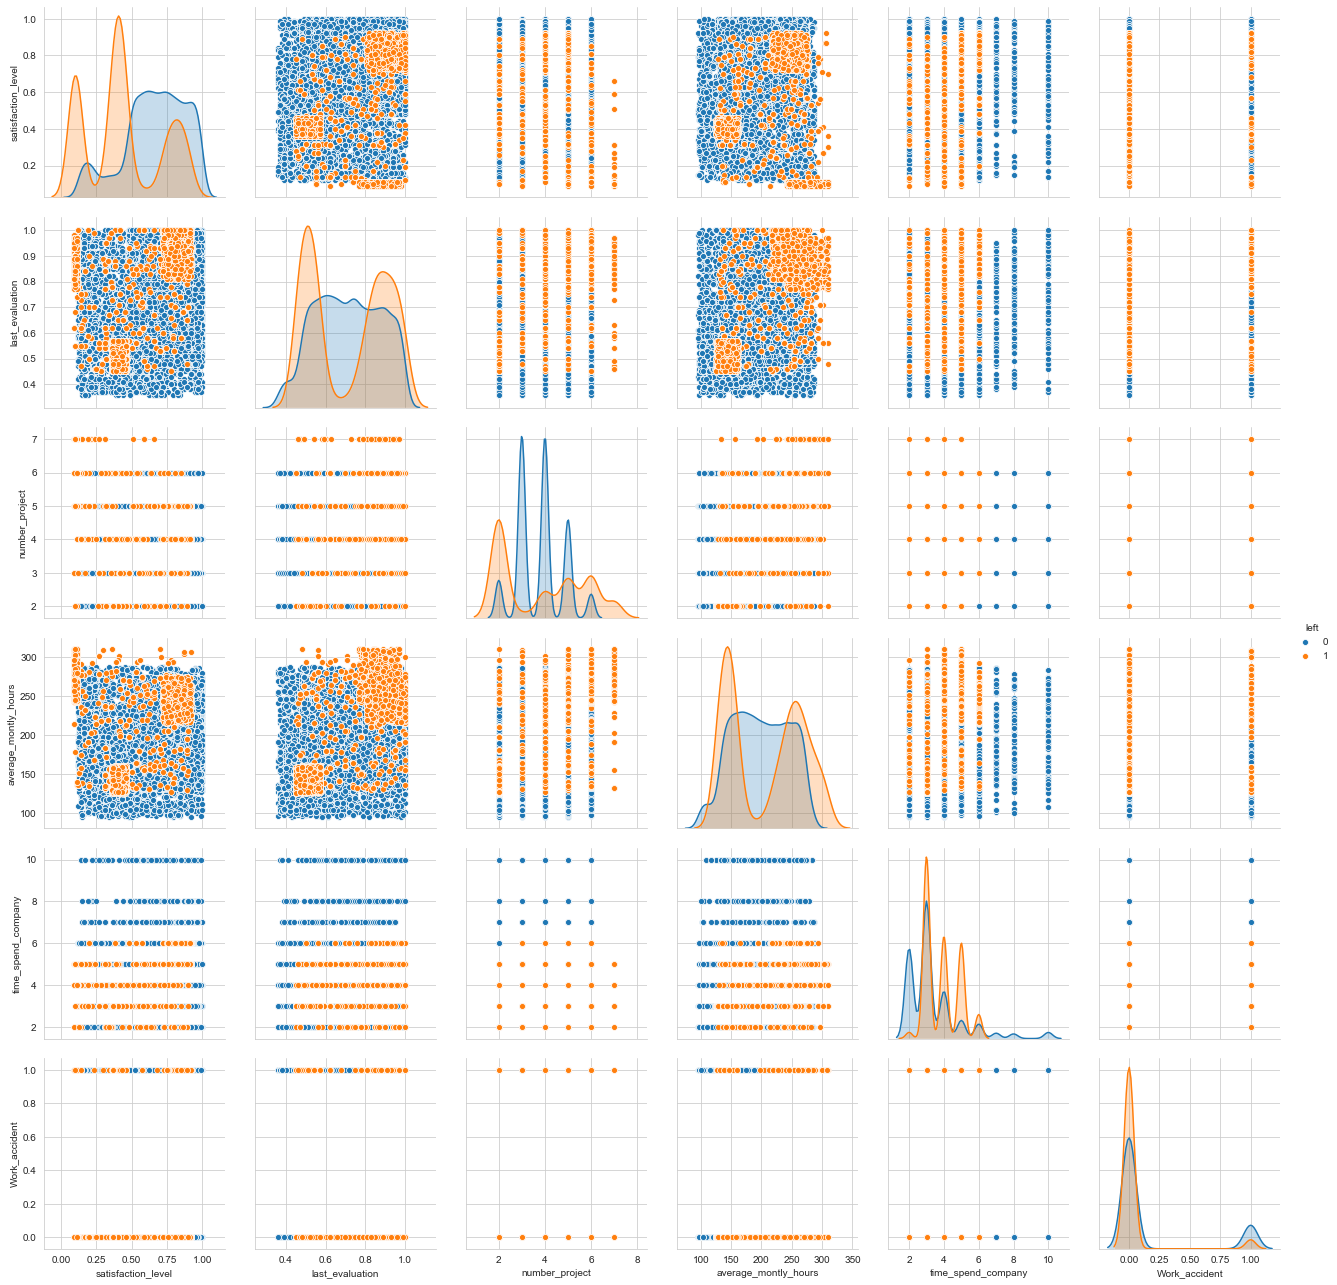

In [18]:
components=df.drop(['left','Departments ','salary','promotion_last_5years'],axis=1).columns

sns.set_style("whitegrid");               #Step1:Set the gird to white.
sns.pairplot(df, hue="left",vars=components ,height=3); #.pairplot(dataset,hue='',size=n) function to plot pairplot
plt.show()

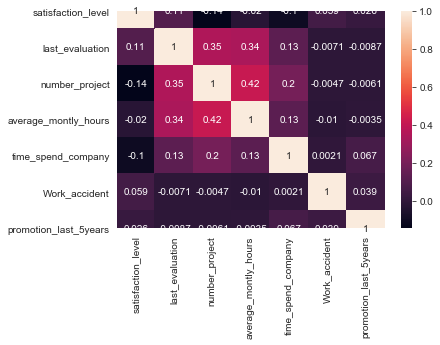

In [19]:
corr=df.drop(['left'],axis=1).corr()
sns.heatmap(corr, annot=True)

summary:<br>
1.We see no correlation between features

# 4. Data pre-processing and cleaning

#### Other way to remove outliers is zscore but it needs all fetures to be numerical

## B.Converting all features to numerical features 

#### First we need to convert the string values to int so that we can apply the distance based models like KNN 

In [105]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['Departments ']= label_encoder.fit_transform(df['Departments ']) 
df['salary']= label_encoder.fit_transform(df['salary']) 

## D.Removing outliers using standard methods

In [106]:
# If data has outliers then we can remove them by using zscore<br>
from scipy import stats
z=abs(stats.zscore(df))
print(np.where(z>3))
df=df[(z<3).all(axis=1)]

(array([   18,    82,   171,   287,   584,   751,  1000,  1667,  4499,
        4500,  4501,  4502,  4503,  4504,  4505,  4506,  4507,  4508,
        4509,  4510,  4511,  4512,  4536,  4537,  4538,  4539,  4540,
        4541,  4542,  4543,  4544,  4545,  4546,  4547,  4548,  4549,
        4550,  4551,  4552,  4553,  4554,  4555,  4556,  4557,  4558,
        4727,  4728,  4729,  4730,  4731,  4732,  4733,  4734,  4735,
        4736,  4737,  4738,  5031,  5032,  5033,  5034,  5035,  5036,
        5037,  5038,  5039,  5040,  5041,  5042,  5055,  5056,  5057,
        5058,  5059,  5060,  5115,  5116,  5117,  5118,  5119,  5120,
        5121,  5122,  5518,  5519,  5520,  5521,  5522,  5523,  5524,
        5525,  5526,  5527,  5528,  5529,  5530,  5531,  5532, 10776,
       10777, 10778, 10779, 10780, 10855, 10856, 10857, 10858, 10859,
       10933, 10934, 10935, 10936, 10937, 10938, 10939, 10940, 10941,
       10942, 11007, 11008, 11009, 11010, 11011, 11078, 11079, 11080,
       11081, 11082

### F.Normalizing all numerical features

In [107]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [108]:
y=df['left']
x=df.drop(['left'],axis=1)

In [109]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x['satisfaction_level'].values.reshape(1,-1))
satisfaction_level_tranformed = normalizer.transform(x['satisfaction_level'].values.reshape(1,-1))

In [110]:
normalizer.fit(x['last_evaluation'].values.reshape(1,-1))
last_evaluation_tranformed = normalizer.transform(x['last_evaluation'].values.reshape(1,-1))

In [111]:
normalizer.fit(x['number_project'].values.reshape(1,-1))
number_project_tranformed = normalizer.transform(x['number_project'].values.reshape(1,-1))

In [112]:
normalizer.fit(x['average_montly_hours'].values.reshape(1,-1))
average_montly_hours_tranformed = normalizer.transform(x['average_montly_hours'].values.reshape(1,-1))

In [113]:
normalizer.fit(x['time_spend_company'].values.reshape(1,-1))
time_spend_company_tranformed = normalizer.transform(x['time_spend_company'].values.reshape(1,-1))

In [114]:
normalizer.fit(x['Work_accident'].values.reshape(1,-1))
Work_accident_tranformed = normalizer.transform(x['Work_accident'].values.reshape(1,-1))

In [115]:
normalizer.fit(x['promotion_last_5years'].values.reshape(1,-1))
promotion_last_5years_tranformed = normalizer.transform(x['promotion_last_5years'].values.reshape(1,-1))

In [116]:
normalizer.fit(x['Departments '].values.reshape(1,-1))
Departments_tranformed = normalizer.transform(x['Departments '].values.reshape(1,-1))

In [117]:
normalizer.fit(x['salary'].values.reshape(1,-1))
salary_tranformed = normalizer.transform(x['salary'].values.reshape(1,-1))

In [118]:
x['satisfaction_level']= satisfaction_level_tranformed.transpose()
x['last_evaluation']= last_evaluation_tranformed.transpose()
x['number_project']= number_project_tranformed.transpose()
x['average_montly_hours']= average_montly_hours_tranformed.transpose()
x['time_spend_company']= time_spend_company_tranformed.transpose()
x['Work_accident']= Work_accident_tranformed.transpose()
x['Departments ']= Departments_tranformed.transpose()
x['salary']= salary_tranformed.transpose()

In [119]:
x

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
0,0.004811,0.006012,0.004173,0.006326,0.007091,0.0,0,0.008913,0.005633
1,0.010129,0.009756,0.010434,0.010557,0.014182,0.0,0,0.008913,0.011266
2,0.001393,0.009983,0.014607,0.010960,0.009455,0.0,0,0.008913,0.011266
3,0.009116,0.009870,0.010434,0.008985,0.011819,0.0,0,0.008913,0.005633
4,0.004685,0.005899,0.004173,0.006407,0.007091,0.0,0,0.008913,0.005633
...,...,...,...,...,...,...,...,...,...
14994,0.005065,0.006466,0.004173,0.006084,0.007091,0.0,0,0.010186,0.005633
14995,0.004685,0.005445,0.004173,0.006447,0.007091,0.0,0,0.010186,0.005633
14996,0.004685,0.006012,0.004173,0.005762,0.007091,0.0,0,0.010186,0.005633
14997,0.001393,0.010891,0.012520,0.011282,0.009455,0.0,0,0.010186,0.005633


### E .Train_test Split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [121]:
round(X_train, 2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
8269,0.01,0.01,0.01,0.01,0.01,0.00,0,0.01,0.01
10602,0.01,0.01,0.01,0.01,0.01,0.00,0,0.00,0.01
3141,0.01,0.00,0.01,0.01,0.01,0.02,0,0.01,0.01
5801,0.01,0.01,0.01,0.01,0.00,0.02,0,0.00,0.01
10662,0.01,0.01,0.01,0.01,0.01,0.00,0,0.01,0.01
...,...,...,...,...,...,...,...,...,...
5274,0.01,0.01,0.01,0.01,0.01,0.02,0,0.01,0.01
14043,0.01,0.01,0.01,0.01,0.00,0.00,0,0.01,0.01
5473,0.01,0.01,0.01,0.01,0.01,0.00,0,0.01,0.01
866,0.01,0.01,0.00,0.01,0.01,0.00,0,0.00,0.01


# Note: Important too check before applying models

### 1. Normalize/Scale the data before applying to distance based models like linear regression or logidtic reg.

### 2. As the data is slightly imbalance we need to use some other measure like AUC

In [122]:
y.value_counts()

0    10778
1     3552
Name: left, dtype: int64

In [123]:
# as this is a classificatoin task we cannot use MSE we can use Accuracy but it not works well with imbalane data so we use AUC-ROC

# first we need to calculate the tpr ,fpr , threshold values to draw the confusion matrix and AUC-ROC curve



# 5. Building Models

# Model1 : KNN

In [124]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

neigh = KNeighborsClassifier()

parameters = {'n_neighbors': range(1,100,10)}

clf = GridSearchCV(neigh, parameters, cv=10, scoring='roc_auc')

clf.fit(X_train, y_train)



GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': range(1, 100, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [125]:
clf.best_params_

{'n_neighbors': 11}

In [126]:
from sklearn.model_selection import cross_val_score
k_range = range(1,100,10)
k_scores = []


for k in k_range:
  
    knn = KNeighborsClassifier(n_neighbors=k)
    
    scores = cross_val_score(knn,X_train, y_train, cv=10, scoring='accuracy')
   
    k_scores.append(scores.mean())
print(k_scores)

[0.9626077104395007, 0.9495903371251126, 0.9407383320095472, 0.9343833995768946, 0.9287589365738242, 0.92730060143204, 0.9267798760406281, 0.9239678073562001, 0.9226142903755683, 0.9219884218669581]


Text(0, 0.5, 'Cross-Validated Accuracy')

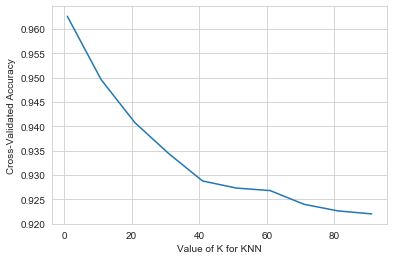

In [127]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

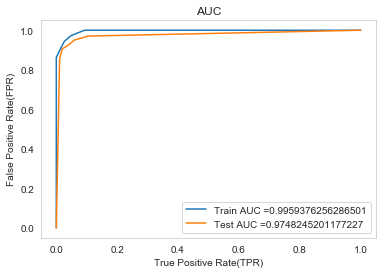

In [128]:
#KNN classifier sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

y_train_pred = neigh.predict_proba(X_train)  
y_test_pred = neigh.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)

#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Classification Report

In [129]:
y_pred=neigh.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3573
           1       0.88      0.92      0.90      1156

    accuracy                           0.95      4729
   macro avg       0.93      0.94      0.94      4729
weighted avg       0.95      0.95      0.95      4729

0.9519983083104251


## Confusion Matrix

In [130]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [131]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr

from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[3197  376]
 [  34 1122]]


In [132]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

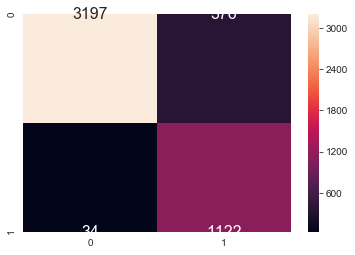

In [133]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Model 2 : Naive Bayes

In [134]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

mnb = MultinomialNB()

parameters = {'alpha': range(1,100,10)}

clf = GridSearchCV(mnb, parameters, cv= 5, scoring='roc_auc')

clf.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='warn', n_jobs=None, param_grid={'alpha': range(1, 100, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [135]:
clf.best_params_

{'alpha': 11}

In [140]:
from sklearn.model_selection import cross_val_score
alpha = range(1,20,2)
k_scores = []


for k in alpha:
  
    mnb = MultinomialNB(alpha=k)
    
    scores = cross_val_score(mnb,X_train, y_train, cv=10, scoring='accuracy')
   
    k_scores.append(scores.mean())
print(k_scores)

[0.750442898701062, 0.750442898701062, 0.750442898701062, 0.750442898701062, 0.750442898701062, 0.750442898701062, 0.750442898701062, 0.750442898701062, 0.750442898701062, 0.750442898701062]


Text(0, 0.5, 'Cross-Validated Accuracy')

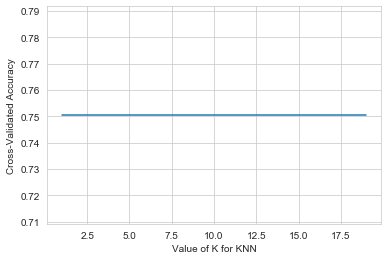

In [141]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(alpha, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

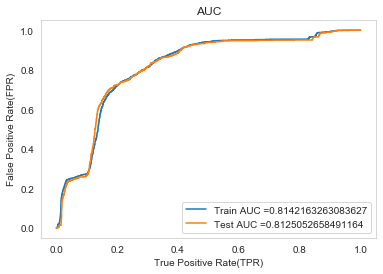

In [142]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=11)
mnb.fit(X_train, y_train)

y_train_pred = mnb.predict_proba(X_train)  
y_test_pred = mnb.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)

#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Classification Report

In [143]:
y_pred=mnb.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3573
           1       0.00      0.00      0.00      1156

    accuracy                           0.76      4729
   macro avg       0.38      0.50      0.43      4729
weighted avg       0.57      0.76      0.65      4729

0.7555508564178474


## Confusion Matrix

In [144]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [145]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr

from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[3078  495]
 [ 454  702]]


In [146]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

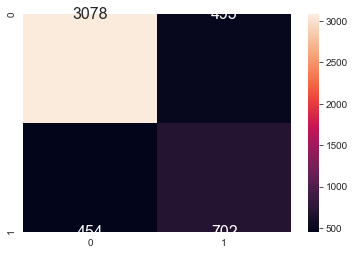

In [147]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Model 3 : Logistic Regression 

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

model = GridSearchCV(LogisticRegression(),parameters, scoring = 'roc_auc', cv=5)
model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
0.8410157340652186


In [149]:
model.best_params_

{'C': 10000}

In [150]:
from sklearn.model_selection import cross_val_score

C= [10**-4, 10**-2, 10**0, 10**2, 10**4]
k_scores = []

for k in C:
    #
    Lr = LogisticRegression(C=k)
    
    scores = cross_val_score(Lr,X_train, y_train, cv=10, scoring='accuracy')
    
    k_scores.append(scores.mean())
print(k_scores)

[0.750442898701062, 0.750442898701062, 0.750442898701062, 0.7746028605355113, 0.7470046347435273]


In [151]:
import math as mt
log_C=[]
for i in C:
     log_C.append(mt.log10(i))

Text(0, 0.5, 'Cross-Validated Accuracy')

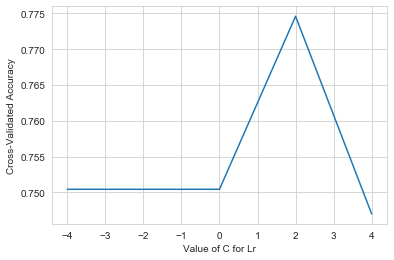

In [152]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(log_C, k_scores)
plt.xlabel('Value of C for Lr')
plt.ylabel('Cross-Validated Accuracy')

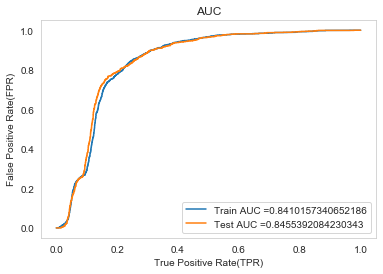

In [153]:
from sklearn.metrics import roc_curve, auc

Lr = LogisticRegression(C=10000)
Lr.fit(X_train, y_train)

y_train_pred = Lr.predict_proba(X_train)  
y_test_pred = Lr.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)
#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Classification Report

In [154]:
y_pred=Lr.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      3573
           1       0.49      0.26      0.34      1156

    accuracy                           0.75      4729
   macro avg       0.64      0.59      0.59      4729
weighted avg       0.72      0.75      0.72      4729

0.7536477056460139


## Confusion Matrix

In [155]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [156]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr

from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[3137  436]
 [ 480  676]]


In [157]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

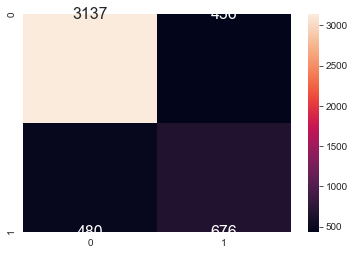

In [158]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Model 3 : Linear regression 

In [159]:
# we can't use linear regression as its a pure regression model 


# Model 4 : SVM

In [160]:
from sklearn.svm import SVC

parameters = [{'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}]   #'poly','sigmoid' takes too much time

model = GridSearchCV(SVC(),parameters, scoring = 'roc_auc', cv=5)
model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
0.8288912587368028


In [161]:
model.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [162]:
from sklearn.model_selection import cross_val_score

C= [10**-4, 10**-2, 10**0, 10**2, 10**4]
k_scores = []

for k in C:
    #
    svm = SVC(C=k,gamma= 0.0001,kernel='rbf')
    
    scores = cross_val_score(svm,X_train, y_train, cv=10, scoring='accuracy')
    
    k_scores.append(scores.mean())
print(k_scores)

[0.750442898701062, 0.750442898701062, 0.750442898701062, 0.750442898701062, 0.750442898701062]


In [163]:
import math as mt
log_C=[]
for i in C:
     log_C.append(mt.log10(i))

Text(0, 0.5, 'Cross-Validated Accuracy')

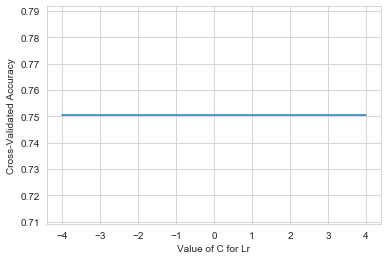

In [164]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(log_C, k_scores)
plt.xlabel('Value of C for Lr')
plt.ylabel('Cross-Validated Accuracy')

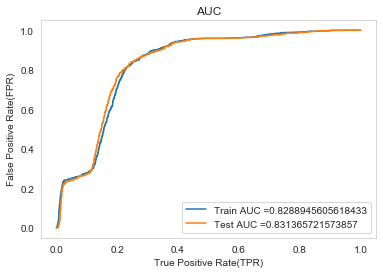

In [166]:
from sklearn.svm import SVC

svm = SVC(C=1000,gamma=1,kernel= 'rbf',probability=True)

svm.fit(X_train, y_train)


y_train_pred = svm.predict_proba(X_train)  
y_test_pred = svm.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)
#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()
print()

# Classification Report

In [167]:
y_pred=svm.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86      3573
           1       0.54      0.25      0.35      1156

    accuracy                           0.76      4729
   macro avg       0.67      0.59      0.60      4729
weighted avg       0.73      0.76      0.73      4729

0.7640093042926623


## Confusion Matrix

In [168]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [169]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[3006  567]
 [ 497  659]]


In [170]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

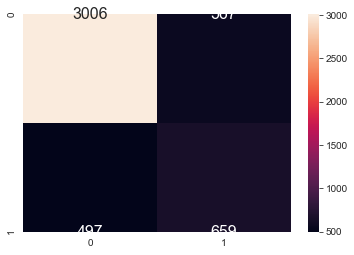

In [171]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Model 5 : Decision Tree

In [172]:
from sklearn.tree import DecisionTreeClassifier
#min_samples_split :The minimum number of samples required to split an internal node, if less than this number can't split

parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 100],'min_samples_split':[5, 10, 100, 500]}

clf = DecisionTreeClassifier()

model = GridSearchCV(clf,parameters, scoring = 'roc_auc', cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [173]:
model.best_params_

{'max_depth': 50, 'min_samples_split': 500}

In [174]:
from sklearn.model_selection import cross_val_score

max_depth= [1,5,15,25]
k_scores = []

for k in max_depth:
    #
    DT = DecisionTreeClassifier(max_depth=k, min_samples_split=100)
    
    scores = cross_val_score(DT,X_train, y_train, cv=10, scoring='accuracy')
    
    k_scores.append(scores.mean())
print(k_scores)

[0.8167875811723248, 0.9731288798056422, 0.9771916013408941, 0.9770875430682615]


Text(0, 0.5, 'Cross-Validated Accuracy')

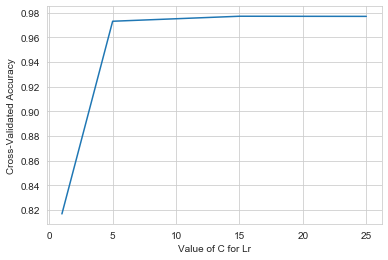

In [175]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(max_depth, k_scores)
plt.xlabel('Value of C for Lr')
plt.ylabel('Cross-Validated Accuracy')

# Tried without hyperparameters

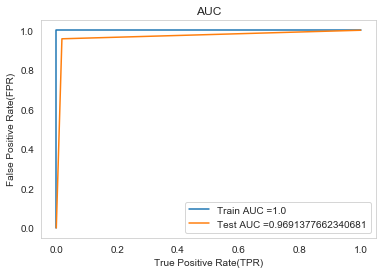

In [176]:
DT = DecisionTreeClassifier()

DT.fit(X_train, y_train)


y_train_pred = DT.predict_proba(X_train)  
y_test_pred = DT.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)
#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()
print()

## Overfitting on train data as we are training very deep trees 

# Traning with best hyperparameters

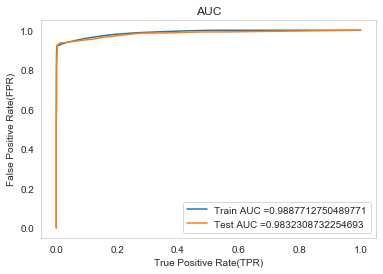

In [177]:
DT = DecisionTreeClassifier(max_depth=50,min_samples_split=500)

DT.fit(X_train, y_train)


y_train_pred = DT.predict_proba(X_train)  
y_test_pred = DT.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)
#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()
print()

# Classification Report

In [178]:
y_pred=DT.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3573
           1       0.99      0.92      0.96      1156

    accuracy                           0.98      4729
   macro avg       0.98      0.96      0.97      4729
weighted avg       0.98      0.98      0.98      4729

0.9794882639035737


## Confusion Matrix

In [179]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [180]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[1740 1833]
 [  10 1146]]


In [181]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

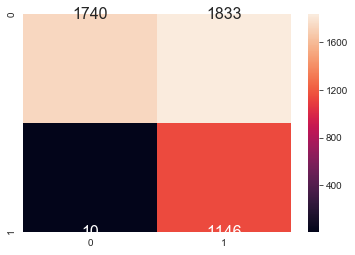

In [182]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

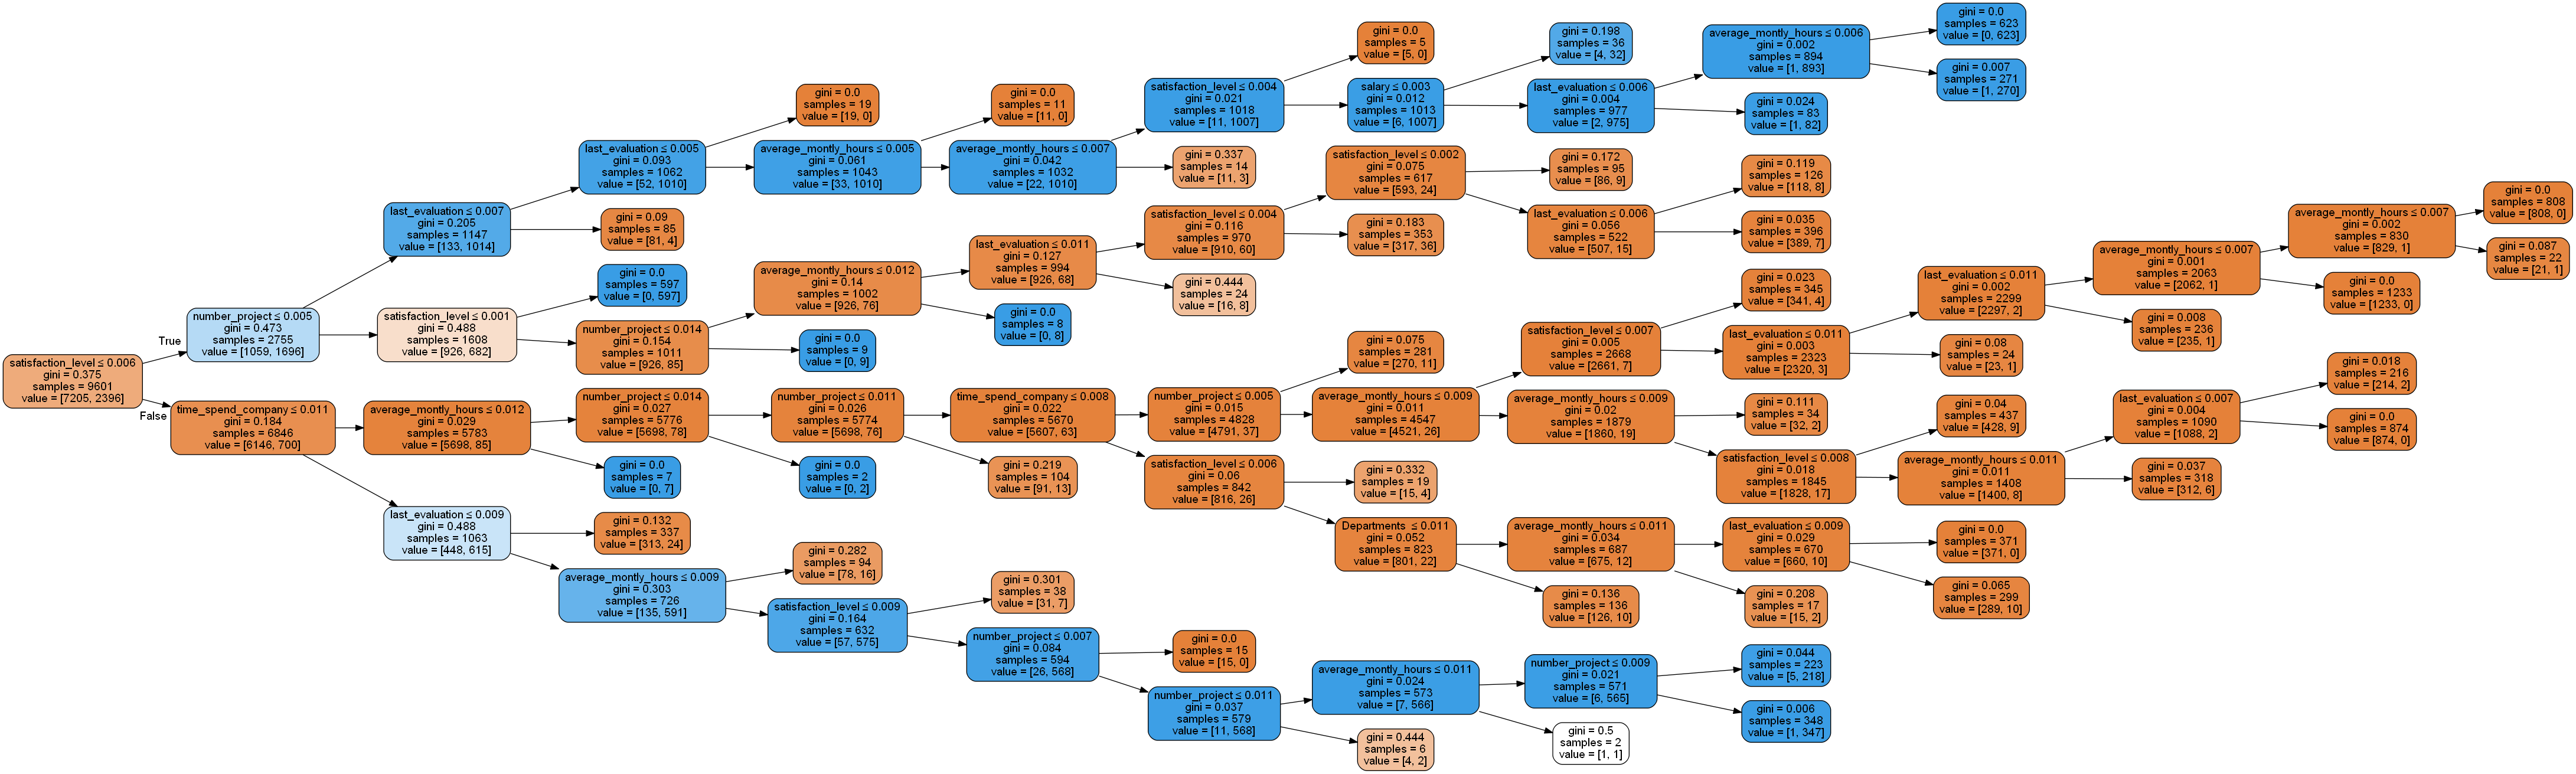

In [183]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO

dot_data = StringIO()

export_graphviz(DT, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=X_train.columns,rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

# Model 6 : Ensemble Techniques 

## A. Bagging

In [184]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}

clf = RandomForestClassifier()

model = GridSearchCV(clf,parameters, scoring = 'roc_auc', cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
1.0


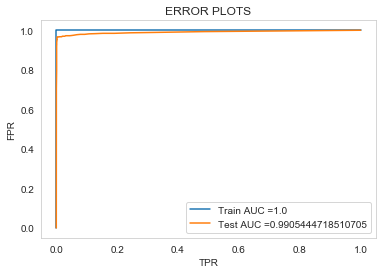

In [186]:
from sklearn.model_selection import GridSearchCV

RF=RandomForestClassifier(max_depth=50,n_estimators=100,class_weight='balanced')
RF.fit(X_train, y_train)


y_train_pred =  RF.predict_proba(X_train)[:,1]      
y_test_pred =  RF.predict_proba(X_test)[:,1]  

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

# Classification Report

In [187]:
y_pred=RF.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3573
           1       0.99      0.97      0.98      1156

    accuracy                           0.99      4729
   macro avg       0.99      0.98      0.99      4729
weighted avg       0.99      0.99      0.99      4729

0.9896384013533517


## Confusion Matrix

In [188]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

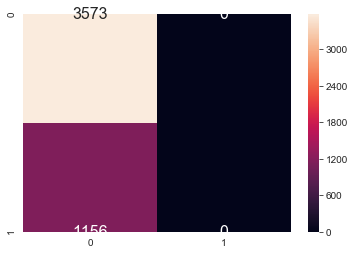

In [189]:
test_df = pd.DataFrame(confusion_matrix(y_test,find_y_pred_by_best_threshold(y_test_pred, tr_thresholds,train_fpr,train_tpr)), range(2),range(2))
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Boosting

In [190]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}

clf = GradientBoostingClassifier()

model = GridSearchCV(clf,parameters, scoring = 'roc_auc', cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_test, y_test))


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
0.9931012534415653


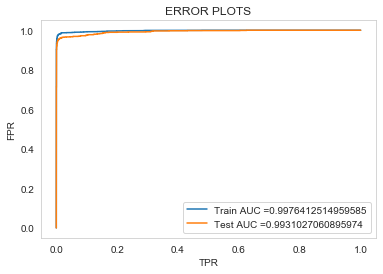

In [191]:
from sklearn.model_selection import GridSearchCV

GBDT=GradientBoostingClassifier(max_depth=5,n_estimators=100)
GBDT.fit(X_train, y_train)


y_train_pred =  GBDT.predict_proba(X_train)[:,1]      
y_test_pred =  GBDT.predict_proba(X_test)[:,1]  

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [192]:
y_pred=GBDT.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3573
           1       0.98      0.95      0.97      1156

    accuracy                           0.98      4729
   macro avg       0.98      0.97      0.98      4729
weighted avg       0.98      0.98      0.98      4729

0.9837174878409812


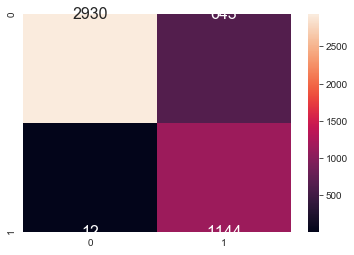

In [193]:
test_df = pd.DataFrame(confusion_matrix(y_test,find_y_pred_by_best_threshold(y_test_pred, tr_thresholds,train_fpr,train_tpr)), range(2),range(2))
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Stacking

## Note: As we have very less data stascking is not advisable 

## Tried using SGDclassifier with different types of loss 

In [194]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [195]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(X_train, y_train)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(X_train, y_train)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(X_train, y_train)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(X_train, y_train)
#print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding))))
sig_clf2.fit(X_train, y_train)
#print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding))))
sig_clf3.fit(X_train, y_train)
#print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(X_train, y_train)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(y_test, sclf.predict_proba(X_test))))
    log_error =log_loss(y_test, sclf.predict_proba(X_test))
    if best_alpha > log_error:
        best_alpha = log_error

--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 0.598
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 0.525
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 0.478
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 0.467
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 0.466
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 0.465


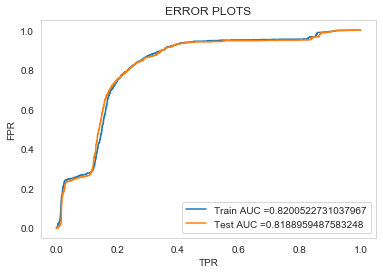

In [198]:
lr = LogisticRegression(C=10)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(X_train, y_train)


y_train_pred =  sclf.predict_proba(X_train)[:,1]      
y_test_pred =  sclf.predict_proba(X_test)[:,1]  

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

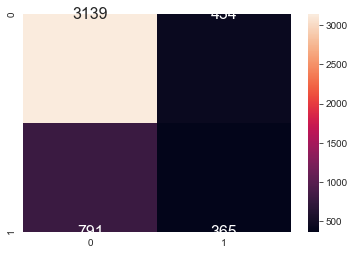

In [199]:
## Confusion Matrix

def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

test_df = pd.DataFrame(confusion_matrix(y_test,find_y_pred_by_best_threshold(y_test_pred, tr_thresholds,train_fpr,train_tpr)), range(2),range(2))
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

## XGBoost

[00:15:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


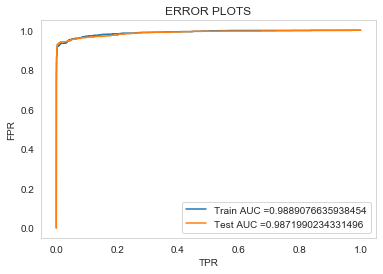

In [200]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)


y_train_pred =  xgb_model.predict(X_train)      
y_test_pred =  xgb_model.predict(X_test) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

# 6.Model Comparison

In [204]:
#https://stackoverflow.com/questions/18601688/python-prettytable-example

from prettytable import PrettyTable
table = PrettyTable()

#setting column names
table.field_names = [ "Sr.No","Model", "Accuracy", "AUC"]

#setting row values
table.add_row(['1',"KNN", '95.199','97.49' ])
table.add_row(['2',"Naive Bayes",'75.55' ,'81.25' ])
table.add_row(['3',"Logistic Regression", '7536','84.57' ])
table.add_row(['4',"SVM", '76.40','83.13' ])
table.add_row(['5',"Decision Tree",'97.94' ,'98.32' ])
table.add_row(['6',"RandomForest",'98.96' ,'99.05' ])
table.add_row(['7',"GBDT",'98.37' ,'99.31' ])
table.add_row(['8',"Xgboost",'--' ,'98.71' ])
table.add_row(['9',"Stacking", '--','81.88' ])
print(table)

+-------+---------------------+----------+-------+
| Sr.No |        Model        | Accuracy |  AUC  |
+-------+---------------------+----------+-------+
|   1   |         KNN         |  95.199  | 97.49 |
|   2   |     Naive Bayes     |  75.55   | 81.25 |
|   3   | Logistic Regression |   7536   | 84.57 |
|   4   |         SVM         |  76.40   | 83.13 |
|   5   |    Decision Tree    |  97.94   | 98.32 |
|   6   |     RandomForest    |  98.96   | 99.05 |
|   7   |         GBDT        |  98.37   | 99.31 |
|   8   |       Xgboost       |    --    | 98.71 |
|   9   |       Stacking      |    --    | 81.88 |
+-------+---------------------+----------+-------+


Summary:<br>
1.Decision tree is the best model amongst all with AUC of 98.32 and is ighly interpretable.<br>
2.As the data is imbalanced the accuracy score is affected.<br>
3.Ensembles like Xgboost ,staking , GBDT  perform very well but are less interpretable

# 7.Creating Submission File

In [205]:
best_model=DT
from sklearn.externals import joblib
filename = 'finalized_model.sav'
joblib.dump(best_model, filename)

['finalized_model.sav']